In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
#read data
df = pd.read_csv('ecomm_summary.csv', delimiter=';')

df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_Id       212 non-null    int64  
 1   Customer_Name     212 non-null    object 
 2   order_date        212 non-null    object 
 3   quantity          212 non-null    int64  
 4   product_id        212 non-null    int64  
 5   product_category  212 non-null    object 
 6   product_price     212 non-null    float64
 7   product_name      212 non-null    object 
 8   order_id          212 non-null    int64  
 9   brand             212 non-null    object 
 10  Sales             212 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 18.3+ KB


In [5]:
df.describe()

,Customer_Id,quantity,product_id,product_price,order_id,Sales
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,533.688679,2.405660,220.504717,6544.245283,142146.292453,8325.212264
std,373.253033,1.133533,198.048094,2934.959553,1427.425269,3751.901335
min,1.000000,1.000000,1.000000,1150.000000,139374.000000,2184.000000
25%,277.750000,1.000000,78.750000,4500.000000,140980.000000,5850.000000
50%,406.500000,2.000000,126.500000,6500.000000,142213.000000,8450.000000
75%,793.500000,3.000000,345.000000,10000.000000,143352.000000,13000.000000
max,1453.000000,4.000000,660.000000,10500.000000,144449.000000,13650.000000


### Data Cleaning

In [6]:
df.isnull().sum()

Customer_Id         0
Customer_Name       0
order_date          0
quantity            0
product_id          0
product_category    0
product_price       0
product_name        0
order_id            0
brand               0
Sales               0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
207    False
208    False
209    False
210    False
211    False
Length: 212, dtype: bool

In [11]:
df = df[(df['quantity'] > 0) & (df['product_price'] > 0)]

### Exploratory Sales Analysis 

Calculating total sales by date, product category and brand

In [12]:
#product sals overview
df['total_sales']=df['quantity']*df['product_price']

In [14]:
df['total_sales'].describe()

count      212.000000
mean     15691.037736
std      10794.473347
min       1680.000000
25%       6720.000000
50%      13000.000000
75%      20000.000000
max      42000.000000
Name: total_sales, dtype: float64

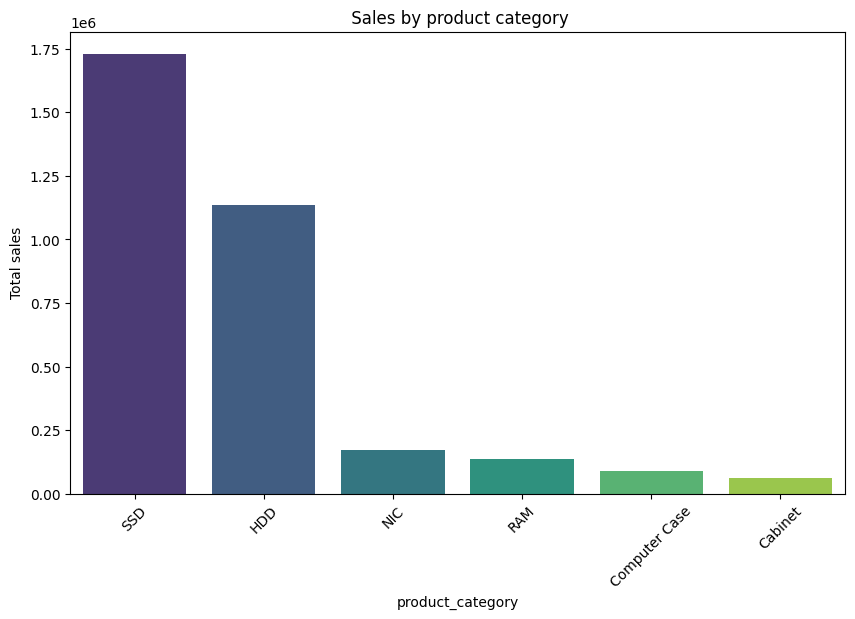

In [17]:
#Sales by product category

sales_by_category = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, hue=sales_by_category.index, palette='viridis')
plt.title(' Sales by product category')
plt.xticks(rotation=45)
plt.ylabel('Total sales')
plt.show()

In [19]:
#make sure order date is in date and time 
df['order_date'] = pd.to_datetime(df['order_date'])

sales_by_date = df.groupby(df['order_date'].dt.date)['total_sales'].sum()

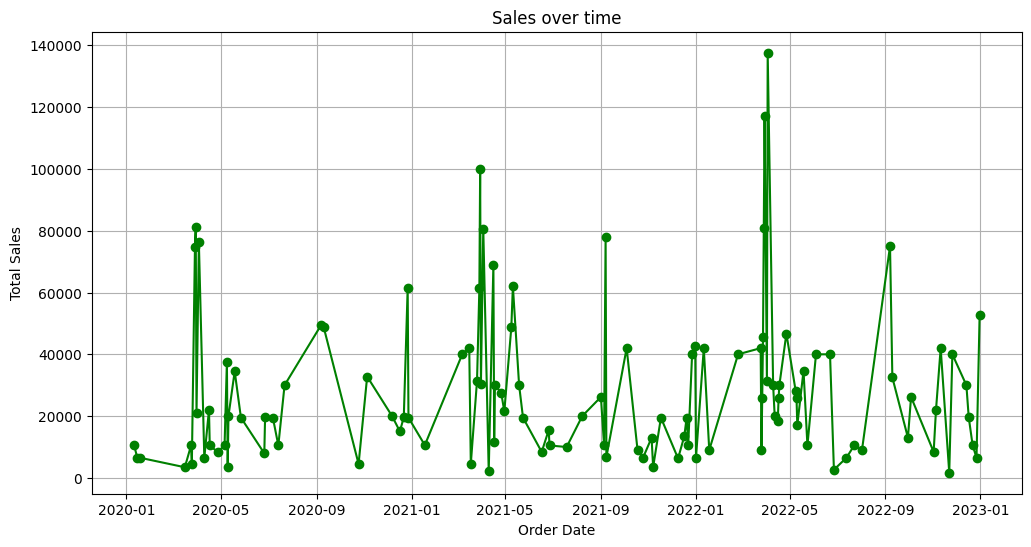

In [21]:

# Plot daily sales
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', color='g')
plt.title('Sales over time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [22]:
#quarterly analysi
df['year_quarter']=df['order_date'].dt.to_period('Q')

In [23]:
sales_by_quarter = df.groupby('year_quarter')['total_sales'].sum()

print(sales_by_quarter.dtypes)

float64


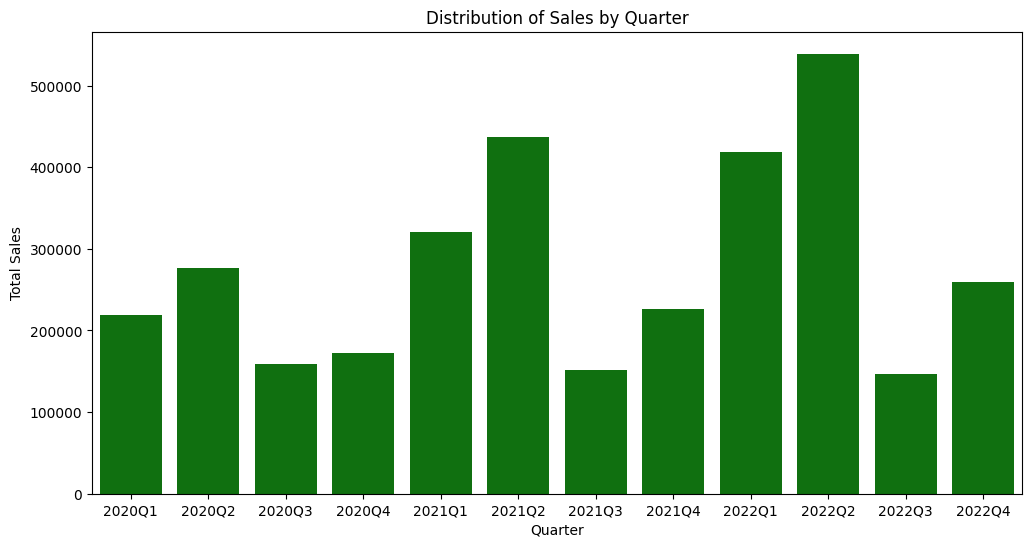

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_quarter.index.astype(str),y= sales_by_quarter.values, color='g')
plt.title('Distribution of Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

Based on monthly sales, it can be concluded that sales do the best in April, May and June seasons of the year. This is summer in North America where the data is extracted from. It can be concluded that sales do the best udinr the summer season. Specifically the month of April and May have the highest sales throughout the year. 

Quarterly sales help understand which seasons to focus on mostly, in regards to planning for different teams. This analysis can help understand what seasons rewuire certain tasks within the team or office. 

## Sales By Brand

In [48]:
sales_by_brand = df.groupby('brand')['total_sales'].sum().sort_values(ascending=True)


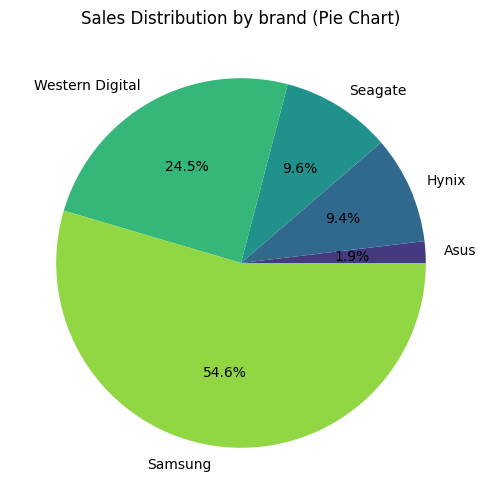

In [49]:
plt.figure(figsize=(10,6))
plt.pie(sales_by_brand, labels=sales_by_brand.index.astype(str), autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sales_by_brand)))
plt.title('Sales Distribution by brand (Pie Chart)')
plt.show()

## Distribution of Order Quantities and Product Price